# Resimulation analysis

In [46]:
# Importing external packages

import os
import sys
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import matplotlib as mpl
import math
import seaborn as sns
import pandas as pd
import numpy as np
import statistics
from collections import defaultdict
from tqdm import tqdm
from pandas.plotting import parallel_coordinates
from matplotlib.lines import Line2D
from ema_workbench.analysis import feature_scoring
from ema_workbench.analysis import dimensional_stacking
import importlib
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [47]:
# Importing model scripts, by first adding the main folder path

module_path = os.path.abspath(os.path.join(".."))
if module_path not in sys.path:
    sys.path.append(module_path)

from model.model_nile import ModelNile
from experimentation.data_generation import generate_input_data
import plotter

import matplotlib
import matplotlib.font_manager as fm

# sns.set(font_scale=1.2)

fm.fontManager.addfont("Minion Pro Regular.ttf")
matplotlib.rc("font", family="Minion Pro")

from matplotlib import rcParams

rcParams["font.family"] = "Minion Pro"
rcParams["font.sans-serif"] = "Minion Pro"
rcParams["font.size"] = 16

Read the results of the open exploration:

In [48]:
experiments = pd.read_csv("../outputs/experiments_resimulation.csv").drop(
    columns="Unnamed: 0"
)
outcomes = pd.read_csv("../outputs/outcomes_resimulation.csv").drop(
    columns="Unnamed: 0"
)

In [49]:
experiments.head(15)

,yearly_demand_growth_rate,blue_nile_mean_coef,white_nile_mean_coef,atbara_mean_coef,blue_nile_dev_coef,white_nile_dev_coef,atbara_dev_coef,v0,v1,v2,...,v157,v158,v159,v160,v161,v162,v163,scenario,policy,model
0,0.02,1.00,1.00,1.0,1.0,1.0,1.0,7.31e-01,0.45,0.42,...,0.08,-0.72,0.20,0.45,0.05,2.57e-01,0.77,Baseline,Policy0,NileProblem
1,0.02,1.00,1.00,1.0,1.0,1.0,1.0,7.31e-01,0.45,0.42,...,0.08,-0.72,0.20,0.45,0.05,2.57e-01,0.77,OptimScen,Policy0,NileProblem
2,0.03,0.75,1.00,1.0,1.0,1.0,1.0,7.31e-01,0.45,0.42,...,0.08,-0.72,0.20,0.45,0.05,2.57e-01,0.77,HighD_LowB,Policy0,NileProblem
3,0.03,1.00,0.75,1.0,1.0,1.0,1.0,7.31e-01,0.45,0.42,...,0.08,-0.72,0.20,0.45,0.05,2.57e-01,0.77,HighD_LowWh,Policy0,NileProblem
4,0.02,1.25,1.00,1.0,1.0,1.0,1.0,7.31e-01,0.45,0.42,...,0.08,-0.72,0.20,0.45,0.05,2.57e-01,0.77,HighB,Policy0,NileProblem
5,0.02,1.00,1.00,1.0,1.0,1.0,1.0,5.14e-03,0.55,0.86,...,0.81,0.71,0.04,0.45,0.57,2.36e-01,0.82,Baseline,Policy1,NileProblem
6,0.02,1.00,1.00,1.0,1.0,1.0,1.0,5.14e-03,0.55,0.86,...,0.81,0.71,0.04,0.45,0.57,2.36e-01,0.82,OptimScen,Policy1,NileProblem
7,0.03,0.75,1.00,1.0,1.0,1.0,1.0,5.14e-03,0.55,0.86,...,0.81,0.71,0.04,0.45,0.57,2.36e-01,0.82,HighD_LowB,Policy1,NileProblem
8,0.03,1.00,0.75,1.0,1.0,1.0,1.0,5.14e-03,0.55,0.86,...,0.81,0.71,0.04,0.45,0.57,2.36e-01,0.82,HighD_LowWh,Policy1,NileProblem
9,0.02,1.25,1.00,1.0,1.0,1.0,1.0,5.14e-03,0.55,0.86,...,0.81,0.71,0.04,0.45,0.57,2.36e-01,0.82,HighB,Policy1,NileProblem


In [50]:
 merged_df = pd.merge(experiments,outcomes, left_index=True, right_index=True)
 levers = [f"v{i}" for i in range(164)]
 objs = list(outcomes.columns)
 merged_df.loc[merged_df["scenario"] == "OptimScen", levers + objs].reset_index().drop(columns = "index").to_csv("../outputs/baseline_results1.csv",index=True)

In [51]:
def normalize_objs(df, directions):
    desirability_couples = list()
    working_df = df.copy()
    for i, col in enumerate(df.columns):
        if directions[i] == "min":
            best, worst = df[col].min(), df[col].max()
        elif directions[i] == "max":
            best, worst = df[col].max(), df[col].min()
        desirability_couples.append((worst, best))
        working_df[col] = (df[col] - worst) / (best - worst)

    return working_df, desirability_couples

In [52]:
from scipy.stats import linregress

In [53]:
scenario_indexes = {
    scen: list(experiments.loc[experiments["scenario"] == scen].index)
    for scen in experiments["scenario"].unique()
}
slope_dfs = {}
corr_dfs = {}


for scen, indexes in scenario_indexes.items():
    print("---------------------------------")
    print(scen)
    print("---------------------------------")
    norm_df, desire_couples = normalize_objs(
        outcomes.loc[indexes], ["min", "min", "min", "max"]
    )

    cor_template = norm_df.corr()
    reg_template = cor_template.copy()

    for name1 in cor_template.columns:
        for name2 in cor_template.columns:
            if name1 == name2:
                cor_template.at[name1, name2] = None
            #             if name1 == "sudan_90" or name2 == "sudan_90":
            #                 cor_template.at[name1, name2] = None
            #                 reg_template.at[name1, name2] = None
            if cor_template.loc[name1, name2] is None:
                continue

            slope, intercept, r_value, p_value, std_err = linregress(
                x=norm_df[name1], y=norm_df[name2]
            )
            if reg_template.at[name1, name2] == cor_template.at[name1, name2]:
                if abs(slope) > 1:
                    slope = 1 / slope

                reg_template.at[name1, name2] = slope
                reg_template.at[name2, name1] = slope

            # dif_series = abs(norm_df[name1] - norm_df[name2])
            # cor_template.at[name1,name2] = dif_series.mean()

    slope_dfs[scen] = reg_template
    corr_dfs[scen] = cor_template
    print(outcomes.loc[indexes].describe())
    outcomes.loc[indexes].describe().to_excel(f"../plots/tables/{scen}_statistics.xlsx")

---------------------------------
Baseline
---------------------------------
       egypt_irr  egypt_low_had  sudan_irr  ethiopia_hydro
count     748.00         748.00     748.00          748.00
mean        4.54           0.13       0.70           13.29
std         1.36           0.18       0.81            1.47
min         1.87           0.00       0.00            9.42
25%         3.51           0.02       0.11           12.11
50%         4.45           0.05       0.36           13.57
75%         5.34           0.17       1.02           14.75
max        11.14           0.83       3.26           15.08
---------------------------------
OptimScen
---------------------------------
       egypt_irr  egypt_low_had  sudan_irr  ethiopia_hydro
count     748.00         748.00     748.00          748.00
mean        4.54           0.13       0.70           13.29
std         1.36           0.18       0.81            1.47
min         1.87           0.00       0.00            9.42
25%         3.51   

In [54]:
slope, intercept, r_value, p_value, std_err = linregress(
    x=outcomes["egypt_low_had"], y=outcomes["egypt_irr"]
)
1 / slope

0.049972013373848344

In [55]:
pd.set_option("display.precision", 2)
from matplotlib.colors import LinearSegmentedColormap

my_cmap = LinearSegmentedColormap.from_list(
    "rg", ["salmon", "w", "cornflowerblue"], N=256
)

In [56]:
obj_names = {
    "egypt_irr": "Egypt Irr. Deficit",
    "egypt_low_had": "Egypt Low HAD",
    "sudan_irr": "Sudan Irr. Deficit",
    "ethiopia_hydro": "Ethiopia Hydropower",
}

In [70]:
for scen in experiments["scenario"].unique():
    print("---------")
    print(scen)
    print("---------\n")
    slope_df = (
        slope_dfs[scen]
        .dropna(axis=0, how="all")
        .dropna(axis=1, how="all")
        .fillna(1)
        .rename(columns=obj_names, index=obj_names)
        .style.background_gradient(axis=None, cmap=my_cmap, vmin=-1, vmax=1)
    )
    slope_df
    slope_df.to_excel(f"../plots/tables/{scen}_scenario_regression_slopes.xlsx")

    corr_df = (
        corr_dfs[scen]
        .dropna(axis=0, how="all")
        .dropna(axis=1, how="all")
        .fillna(1)
        .rename(columns=obj_names, index=obj_names)
        .style.background_gradient(axis=None, cmap=my_cmap, vmin=-1, vmax=1)
    )
    corr_df
    corr_df.to_excel(f"../plots/tables/{scen}_scenario_correlations.xlsx")

---------
Baseline
---------

---------
OptimScen
---------

---------
HighD_LowB
---------

---------
HighD_LowWh
---------

---------
HighB
---------



In [71]:
slope_dfs["Baseline"].dropna(axis=0, how="all").dropna(axis=1, how="all").fillna(
    1
).rename(columns=obj_names, index=obj_names).style.background_gradient(
    axis=None, cmap=my_cmap, vmin=-1, vmax=1
)

,Egypt Irr. Deficit,Egypt Low HAD,Sudan Irr. Deficit,Ethiopia Hydropower
Egypt Irr. Deficit,1.000000,-0.522202,-0.943137,-0.794570
Egypt Low HAD,-0.522202,1.000000,0.074666,0.019910
Sudan Irr. Deficit,-0.943137,0.074666,1.000000,0.611221
Ethiopia Hydropower,-0.794570,0.019910,0.611221,1.000000


In [72]:
corr_dfs["Baseline"].dropna(axis=0, how="all").dropna(axis=1, how="all").fillna(
    1
).rename(columns=obj_names, index=obj_names).style.background_gradient(
    axis=None, cmap=my_cmap, vmin=-1, vmax=1
)

,Egypt Irr. Deficit,Egypt Low HAD,Sudan Irr. Deficit,Ethiopia Hydropower
Egypt Irr. Deficit,1.000000,-0.361773,-0.625568,-0.711667
Egypt Low HAD,-0.361773,1.000000,0.063587,0.016251
Sudan Irr. Deficit,-0.625568,0.063587,1.000000,0.585811
Ethiopia Hydropower,-0.711667,0.016251,0.585811,1.000000


In [73]:
slope_dfs["OptimScen"].dropna(axis=0, how="all").dropna(axis=1, how="all").fillna(
    1
).rename(columns=obj_names, index=obj_names).style.background_gradient(
    axis=None, cmap=my_cmap, vmin=-1, vmax=1
)

,Egypt Irr. Deficit,Egypt Low HAD,Sudan Irr. Deficit,Ethiopia Hydropower
Egypt Irr. Deficit,1.000000,-0.522202,-0.943137,-0.794570
Egypt Low HAD,-0.522202,1.000000,0.074666,0.019910
Sudan Irr. Deficit,-0.943137,0.074666,1.000000,0.611221
Ethiopia Hydropower,-0.794570,0.019910,0.611221,1.000000


In [74]:
corr_dfs["OptimScen"].dropna(axis=0, how="all").dropna(axis=1, how="all").fillna(
    1
).rename(columns=obj_names, index=obj_names).style.background_gradient(
    axis=None, cmap=my_cmap, vmin=-1, vmax=1
)

,Egypt Irr. Deficit,Egypt Low HAD,Sudan Irr. Deficit,Ethiopia Hydropower
Egypt Irr. Deficit,1.000000,-0.361773,-0.625568,-0.711667
Egypt Low HAD,-0.361773,1.000000,0.063587,0.016251
Sudan Irr. Deficit,-0.625568,0.063587,1.000000,0.585811
Ethiopia Hydropower,-0.711667,0.016251,0.585811,1.000000


In [75]:
slope_dfs["HighD_LowB"].dropna(axis=0, how="all").dropna(
    axis=1, how="all"
).fillna(1).rename(columns=obj_names, index=obj_names).style.background_gradient(
    axis=None, cmap=my_cmap, vmin=-1, vmax=1
)

,Egypt Irr. Deficit,Egypt Low HAD,Sudan Irr. Deficit,Ethiopia Hydropower
Egypt Irr. Deficit,1.000000,0.919835,-0.724152,-0.751953
Egypt Low HAD,0.919835,1.000000,-0.757712,-0.818310
Sudan Irr. Deficit,-0.724152,-0.757712,1.000000,0.563257
Ethiopia Hydropower,-0.751953,-0.818310,0.563257,1.000000


In [76]:
corr_dfs["HighD_LowB"].dropna(axis=0, how="all").dropna(
    axis=1, how="all"
).fillna(1).rename(columns=obj_names, index=obj_names).style.background_gradient(
    axis=None, cmap=my_cmap, vmin=-1, vmax=1
)

,Egypt Irr. Deficit,Egypt Low HAD,Sudan Irr. Deficit,Ethiopia Hydropower
Egypt Irr. Deficit,1.000000,0.787039,-0.892146,-0.747208
Egypt Low HAD,0.787039,1.000000,-0.572115,-0.802468
Sudan Irr. Deficit,-0.892146,-0.572115,1.000000,0.489861
Ethiopia Hydropower,-0.747208,-0.802468,0.489861,1.000000


In [77]:
slope_dfs["HighD_LowWh"].dropna(axis=0, how="all").dropna(axis=1, how="all").fillna(
    1
).rename(columns=obj_names, index=obj_names).style.background_gradient(
    axis=None, cmap=my_cmap, vmin=-1, vmax=1
)

,Egypt Irr. Deficit,Egypt Low HAD,Sudan Irr. Deficit,Ethiopia Hydropower
Egypt Irr. Deficit,1.000000,0.303077,-0.657125,-0.664522
Egypt Low HAD,0.303077,1.000000,-0.497181,-0.547874
Sudan Irr. Deficit,-0.657125,-0.497181,1.000000,0.563877
Ethiopia Hydropower,-0.664522,-0.547874,0.563877,1.000000


In [78]:
corr_dfs["HighD_LowWh"].dropna(axis=0, how="all").dropna(axis=1, how="all").fillna(
    1
).rename(columns=obj_names, index=obj_names).style.background_gradient(
    axis=None, cmap=my_cmap, vmin=-1, vmax=1
)

,Egypt Irr. Deficit,Egypt Low HAD,Sudan Irr. Deficit,Ethiopia Hydropower
Egypt Irr. Deficit,1.000000,0.441068,-0.815786,-0.805354
Egypt Low HAD,0.441068,1.000000,-0.183141,-0.671216
Sudan Irr. Deficit,-0.815786,-0.183141,1.000000,0.562932
Ethiopia Hydropower,-0.805354,-0.671216,0.562932,1.000000


In [79]:
slope_dfs["HighB"].dropna(axis=0, how="all").dropna(axis=1, how="all").fillna(
    1
).rename(columns=obj_names, index=obj_names).style.background_gradient(
    axis=None, cmap=my_cmap, vmin=-1, vmax=1
)

,Egypt Irr. Deficit,Sudan Irr. Deficit,Ethiopia Hydropower
Egypt Irr. Deficit,1.000000,-0.085921,-0.421240
Sudan Irr. Deficit,-0.085921,1.000000,-0.070077
Ethiopia Hydropower,-0.421240,-0.070077,1.000000


In [80]:
corr_dfs["HighB"].dropna(axis=0, how="all").dropna(axis=1, how="all").fillna(
    1
).rename(columns=obj_names, index=obj_names).style.background_gradient(
    axis=None, cmap=my_cmap, vmin=-1, vmax=1
)

,Egypt Irr. Deficit,Sudan Irr. Deficit,Ethiopia Hydropower
Egypt Irr. Deficit,1.000000,-0.085273,-0.459621
Sudan Irr. Deficit,-0.085273,1.000000,-0.077043
Ethiopia Hydropower,-0.459621,-0.077043,1.000000


---------
Baseline
---------



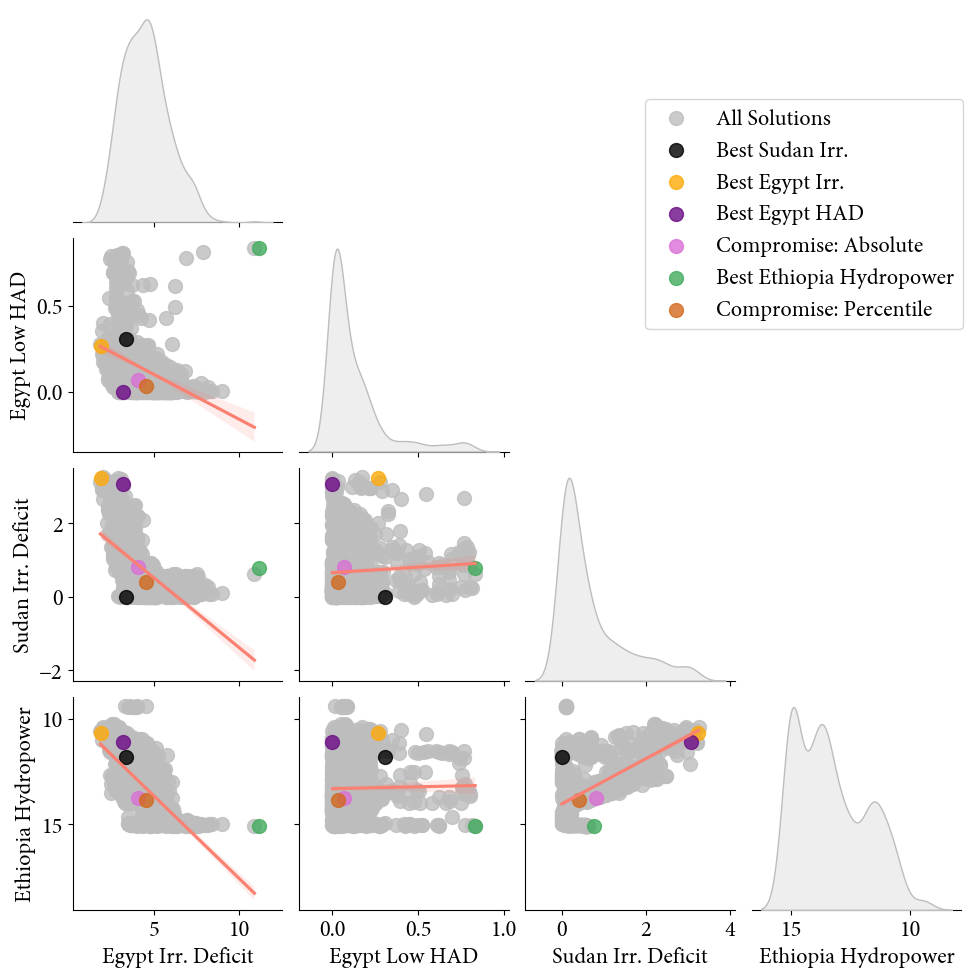

---------
OptimScen
---------



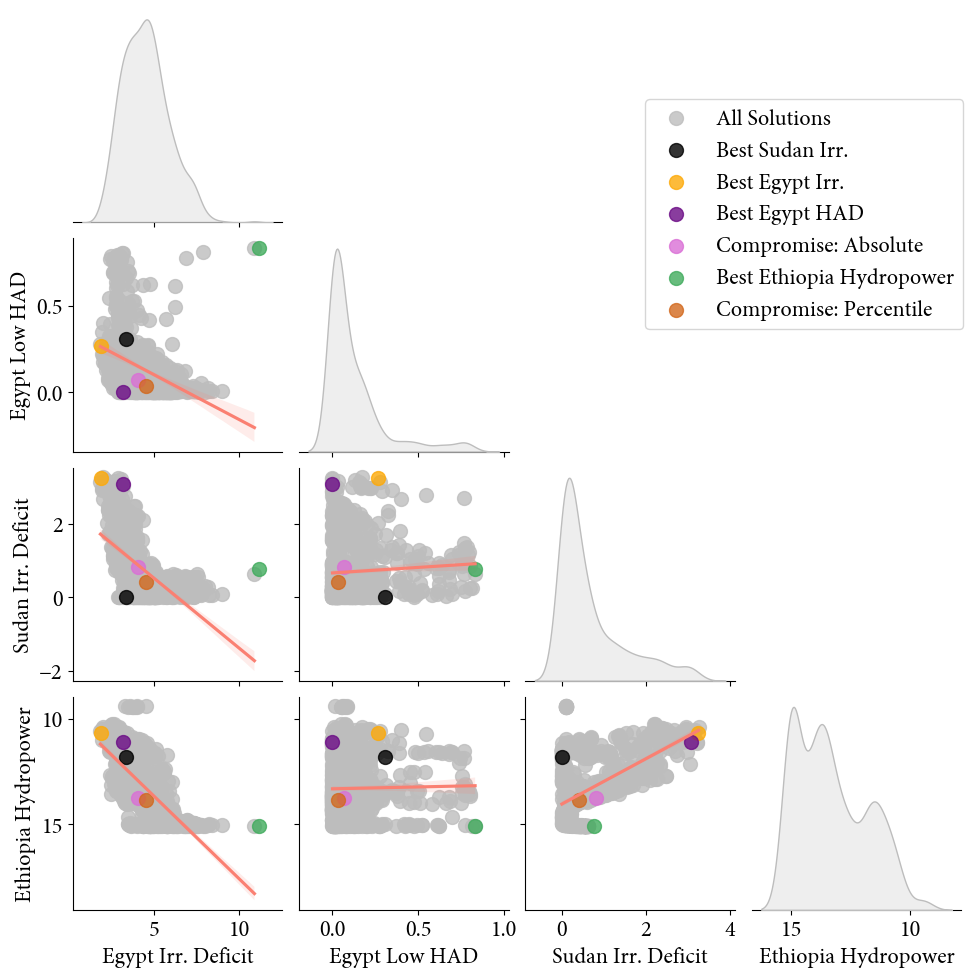

---------
HighD_LowB
---------



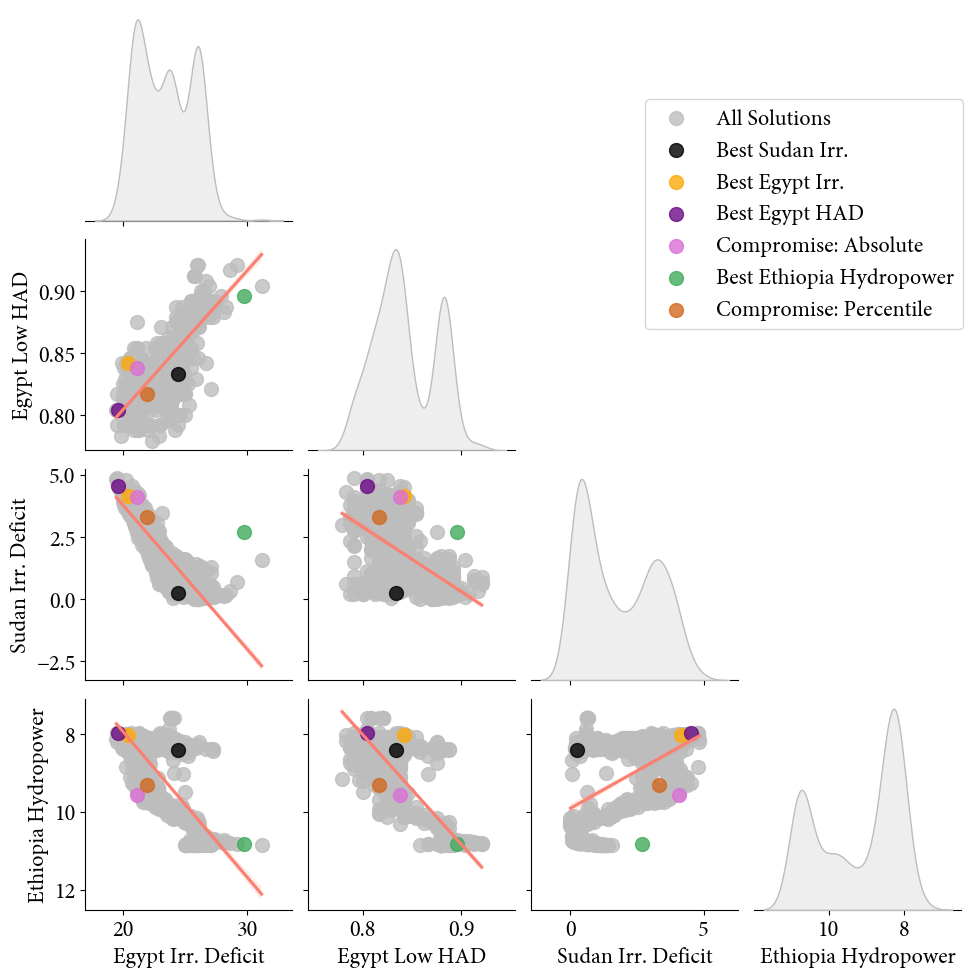

---------
HighD_LowWh
---------



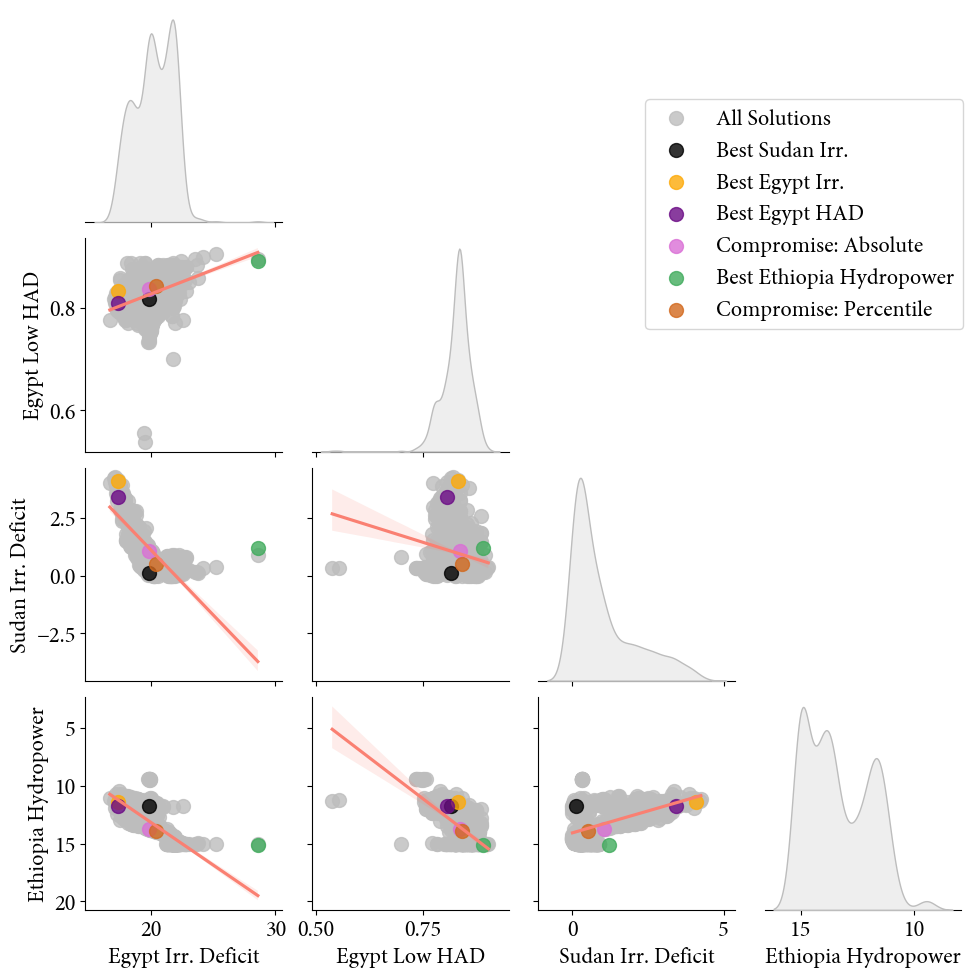

---------
HighB
---------



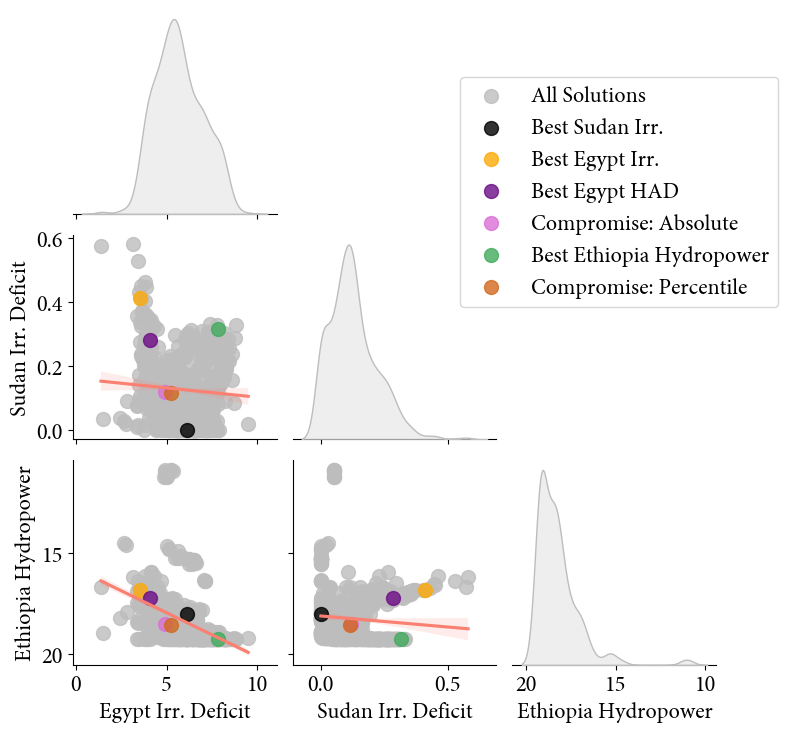

In [81]:
solution_indices = [190, 192, 84, 452, 645, 400]
solution_names = [
    "Best Egypt Irr.",
    "Best Egypt HAD",
    "Best Sudan Irr.",
    "Best Ethiopia Hydropower",
    "Compromise: Percentile",
    "Compromise: Absolute",
]

policy_colors = {
    "Best Egypt HAD": "#6C0C86",
    "Best Ethiopia Hydropower": "#41ab5d",
    "Best Egypt Irr.": "#fdaa09",
    "Best Sudan Irr.": "#000000",
    "Compromise: Percentile": "chocolate",
    "Compromise: Absolute": "orchid",
    "All Solutions": "#bdbdbd",
}

directions_dict = {
    "egypt_irr": "min",
    "egypt_low_had": "min",
    "sudan_irr": "min",
    "ethiopia_hydro": "max",
}

for scen in experiments["scenario"].unique():
    print("---------")
    print(scen)
    print("---------\n")

    #     norm_df = normalize_objs(
    #             outcomes.loc[
    #                 scenario_indexes[scen],
    #                 slope_dfs[scen].dropna(axis=0, how="all").dropna(axis=1, how="all").columns,
    #             ],
    #             directions=[directions_dict[i] for i in slope_dfs[scen].columns],
    #         )[0].rename(columns = obj_names).reset_index(drop=True)

    norm_df = (
        outcomes.loc[
            scenario_indexes[scen],
            slope_dfs[scen].dropna(axis=0, how="all").dropna(axis=1, how="all").columns,
        ]
        .rename(columns=obj_names)
        .reset_index(drop=True)
    )

    norm_df["Name"] = "All Solutions"
    for i, solution_index in enumerate(solution_indices):
        norm_df.loc[solution_index, "Name"] = solution_names[i]
        # norm_df = norm_df.append(norm_df.loc[solution_index, :].copy())

    g = sns.pairplot(
        norm_df,
        corner=True,
        kind="reg",
        hue="Name",
        diag_kind="kde",
        plot_kws={"line_kws": {"color": "salmon"}, "scatter_kws": {"s": 100}},
        palette=policy_colors,
    )
    handles = g._legend_data.values()
    labels = g._legend_data.keys()
    g._legend.remove()
    g.fig.legend(handles=handles, labels=labels, bbox_to_anchor=(0.75, 0.90))
    #     for i in range(len(g.axes)-1):
    #         g.axes[i,0].invert_yaxis()
    #         g.axes[i,i].invert_xaxis()
    g.axes[-1, 0].invert_yaxis()
    g.axes[-1, -1].invert_xaxis()
    plt.savefig(f"../plots/resimulation/{scen}_scenario_pairplot.svg")
    plt.show()

#    g = sns.pairplot(normalize_objs(outcomes.loc[scenario_indexes["HighD_LowWh"],['egypt_irr', 'egypt_90', 'sudan_irr','ethiopia_hydro']],
#                             directions=["min", "min","min","max"])[0],
#              corner=True, kind="reg", diag_kind= "kde",plot_kws={'line_kws':{'color':'red'}})
#    g.axes[3,0].set_xlim((0,1))
#    g.axes[3,0].set_ylim((0,1.2))